
<center> <h1>Cleveland Cardiovascular Health: 
    KNN Analysis on</h1><h1>Predictive Factors Using Cleveland Dataset </h1> 
<h4>DSCI 100: Introduction to Data Science</h4>
<h4>Ayan Araleh, Eugene Ng, Leena Mazhar, Keira Innis</h4>
 </center>












## Introduction:

In 2019, cardiovascular disease (CVD) accounted for 32% of all global deaths, leading WHO to declare CVD to be the leading cause of death worldwide. Given its imminent threat to the global population, reliable predictors are required to diagnose an individual's risk before the progression of the disease. Moreover, many of these predictors can be managed via behavioral and lifestyle factors, hence creating a need for investigation into these predictors (World Health Organization, 2021). To provide examples, these modifiable predictors include, resting blood pressure, cholesterol, activity level, and blood glucose levels. 

The world of science has long debated the reliability and clinical utility of these factors in predicting and managing CVD. Thorough investigations into each of these predictors have been conducted, and throughout its course, a large amount of data has accumulated. Hence, in concurrency with the scientific explorations of CVD predictors, it is essential that we utilize data wrangling and analysis practices to contribute to these investigations.

In accordance with the above, the UC Irvine Machine Learning Repository created a database titled “Heart Disease”. With 14 evidence-based predictors of CVD, this database aims to sort patients into various prevalences of CVD. This report is interested in manageable predictors that can be altered with behavior, thus, of the 14 predictors, the 2 of which are demographical; age & sex, will not be used in this exploration. The remaining 12 include resting blood pressure on admission to the hospital, serum cholesterol, fasting blood sugar, maximum heart rate, exercise-induced angina, and depression induced by exercise relative to rest. A majority of the predictors have a plethora of publications, however, the literature indicates only four of these to be the most manageable. These four include serum cholesterol, fasting blood sugar, resting blood sugar, and maximum heart rate (Pyörälä, et. al., 1979 & Chen, et. al., 2011). 

With these factors in consideration, using the Cleveland database, which is the largest and most widely used by researchers, this report investigates the inquiry: which manageable predictive factor of cardiovascular disease should be reduced the most in the sample population of Cleveland?


## Loading of Libraries 
Preceeding analysis of the dataset, the necessary libraries must be loaded. Additionally, a seed will be set so that the analysis performed can be reproduced, this only has to be done once.

In [1]:
# libraries
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
install.packages("kknn")
library(kknn)
install.packages("rsample")
library(rsample)
install.packages("GGally")
library(GGally)
install.packages("themis")
library(themis)
#setting seed
set.seed(2020)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## Reading the Data Set

Firstly, the dataset this analysis will focus on was pulled from the web and read into R. We tidied the table by including column names and labels to each respective variable (Table 1.1). For clarity, we used the 'mutate' function in R to change the column 'num', which represents diagnoses, to 'diagnosis'. Additionally, this column also classified diagnoses on a scale from 0 to 4, in which 0 indicated no presense of heart disease in a patient, and 4 indicates a high probability of heart disease. For the purpose of this analysis, we made the decision to use binary measurement, on a scale from 0 to 1, where 1 represents the presense of heart disease. This was done as this analysis will not investigate the severity of different prognoses, as well as for simplicity in classification.

The variables included in the original dataset are described as the following, (with the exception of "thal", which was not described in the original source. Upon further investigation of how it was classified in the dataset, it was determined to represent Thalassemia Blood Disorder according to an article from Centers for Disease Control and Prevention (2019)):
* Age (in years)
* Sex (binary, Male or Female)
* cp (Chest pain (1-4):  

  1: typical angina
        
  2: atypical angina
        
  3: non-anginal pain
        
  4: asymptomatic) 
        
* trestbps (Resting Blood Pressure in mm Hg upon hospital admission) 
* chol (Serum Cholestoral, mg/dl) -> (note: direct spelling)
* fbs (Fasting Blood Pressure > 120 mg/dl) (1 = true; 0 = false))
* restecg (Resting Electrocardiographic (0-2), 

    0: normal
          
    1: having ST-T wave abnormality 
          
    2: severe abnormality)
          
* thalach (Max Heart Rate)
* exang (Exercise Induced Angina, (1 = yes; 0 = no))
* oldpeak (ST depression caused by exercise)
* slope (the slope of the peak exercise ST segment (1-3)

    1: upsloping
        
    2: flat
        
    3: downsloping)
        
* ca (number of major vessels with respect to flourosopy colour (0-3))
* thal (Thalessemia blood disorder, 

    3: normal 
        
    6: fixed defect 
        
    7: reversable defect)
        
* num (heart disease diagnosis [0,1] (angiographic disease status)

    0: < 50% diameter narrowing
        
    1: > 50% diameter narrowing)
    
Additionally, before continuing our analysis, Table 1.2 tests if our dataset includes any missing data so that our analysis reflects non-empty observations.
Table 1.3 shows the distribution of patients who are diagnosed with heart disease, and patients who are not diagnosed. This distribution will also determine whether the data must be standardized given a disproportionate number in either case. It is shown that there are 164 patients without a diagnosis, and 139 patients who are diagnosed. Therefore, the analysis will not be biased towards either diagnosis.

**Table 1.1: Cleveland Heart Disease Data**

In [2]:
# importing in data and adding column names
data <- read_csv("https://raw.githubusercontent.com/BeesKneezz/dsci_100_2023_group_7/main/data/processed.cleveland.data", col_names = FALSE)
colnames(data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


*Table includes aforementioned 14 columns from Cleveland Heart Disease Dataset**

**Table 1.2: Missing data test**

In [3]:
#Ensure there is no missing data
test_missing <- sum(is.na(data))
tibble(test_missing)

test_missing
<int>
0


**Table 1.3: Changing num column**

In [4]:
#changing Diagnosis from numerical to factorial (num) range [0,4] -> [0,1]
data_new <- data |>
mutate("diagnosis" = as_factor(num))
data_new$diagnosis[data_new$diagnosis != '0'] <- '1'
data_new <- droplevels(data_new)|>
select(cp,trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, diagnosis)
data_new

cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
3,138,175,0,0,173,0,0.0,1,?,3.0,0


*Table shows refined dataset, with 'num' column renamed to 'diagnosis', now measured on a binary 
(0 = Not diagnosed, 1 = Diagnosed).*

**Table 1.4: Distribution of diagnosis**

In [5]:
#summary of data set 
distributions <- data_new |>
select(diagnosis) |>
group_by(diagnosis) |>
summarize(count = n())

distributions

diagnosis,count
<fct>,<int>
0,164
1,139


*Table 1.4 shows the balance between diagnosed and undiagnosed individuals.*

## Further Data Wrangling: Choosing Predictors Based off Research
From the dataset, there are 13 predictors included - apart from diagnosis. Our principle question intends to find factors in which Cleveland citizens can reduce in order to prevent heart disease. From this, we can eliminate factors that are not controllable for the average individual (such as genetic influence, and overall convenience for an average person). Predictors such as the following were excluded based on relevancy to this analysis; age, sex, cp, restecg, exang, oldpeak, slope, ca, and thal. The aforementioned predictors are predisposed/difficult to control.  
Table 2.1 includes variables that are controllable; trestbps (resting blood pressure), chol (serum cholestoral), fbs (fasting blood sugar), and thalach (max heart rate). To further corroborate the choice of these predictors, according to the Centers for Disease Control and Prevention (2022), fasting blood sugar can be affected by exercise, diet, and stress levels. An article from the American Heart Association (2023) shows that blood pressure and heart rate are controllable through exercise and healthy sleeping habits, the same is proven about cholestoral (2020). 

To visualize the relationship of the variables with diagnosis, we use the function ggpairs in the R tidyverse in figure 1.1. This function also allows to visualize the relationship of each variable with one another, which shows how each predictor might impact or compliment one another. 

**Table 2.1: Selection of controllable predictors**

In [6]:
#selection of preliminary predictors
data_wrangled <- data_new |>
select(trestbps, chol, fbs, thalach, diagnosis)
    #   chol: serum cholestoral in mg/dl
    #   trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    #   thalach: maximum heart rate achieved
    #   fbs: fasting blood sugar
    #   --  Value 0: fasting blood sugar < 120 mg/dl
    #   --  Value 1: fasting blood sugar > 120 mg/dl
    #   diagnosis: diagnosis of heart disease (angiographic disease status)
    #    -- Value 0: < 50% diameter narrowing
    #    -- Value 1: > 50% diameter narrowing
data_wrangled

trestbps,chol,fbs,thalach,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
145,233,1,150,0
160,286,0,108,1
120,229,0,129,1
⋮,⋮,⋮,⋮,⋮
130,131,0,115,1
130,236,0,174,1
138,175,0,173,0


**Figure 1.1: Visualization of controllable predictors**

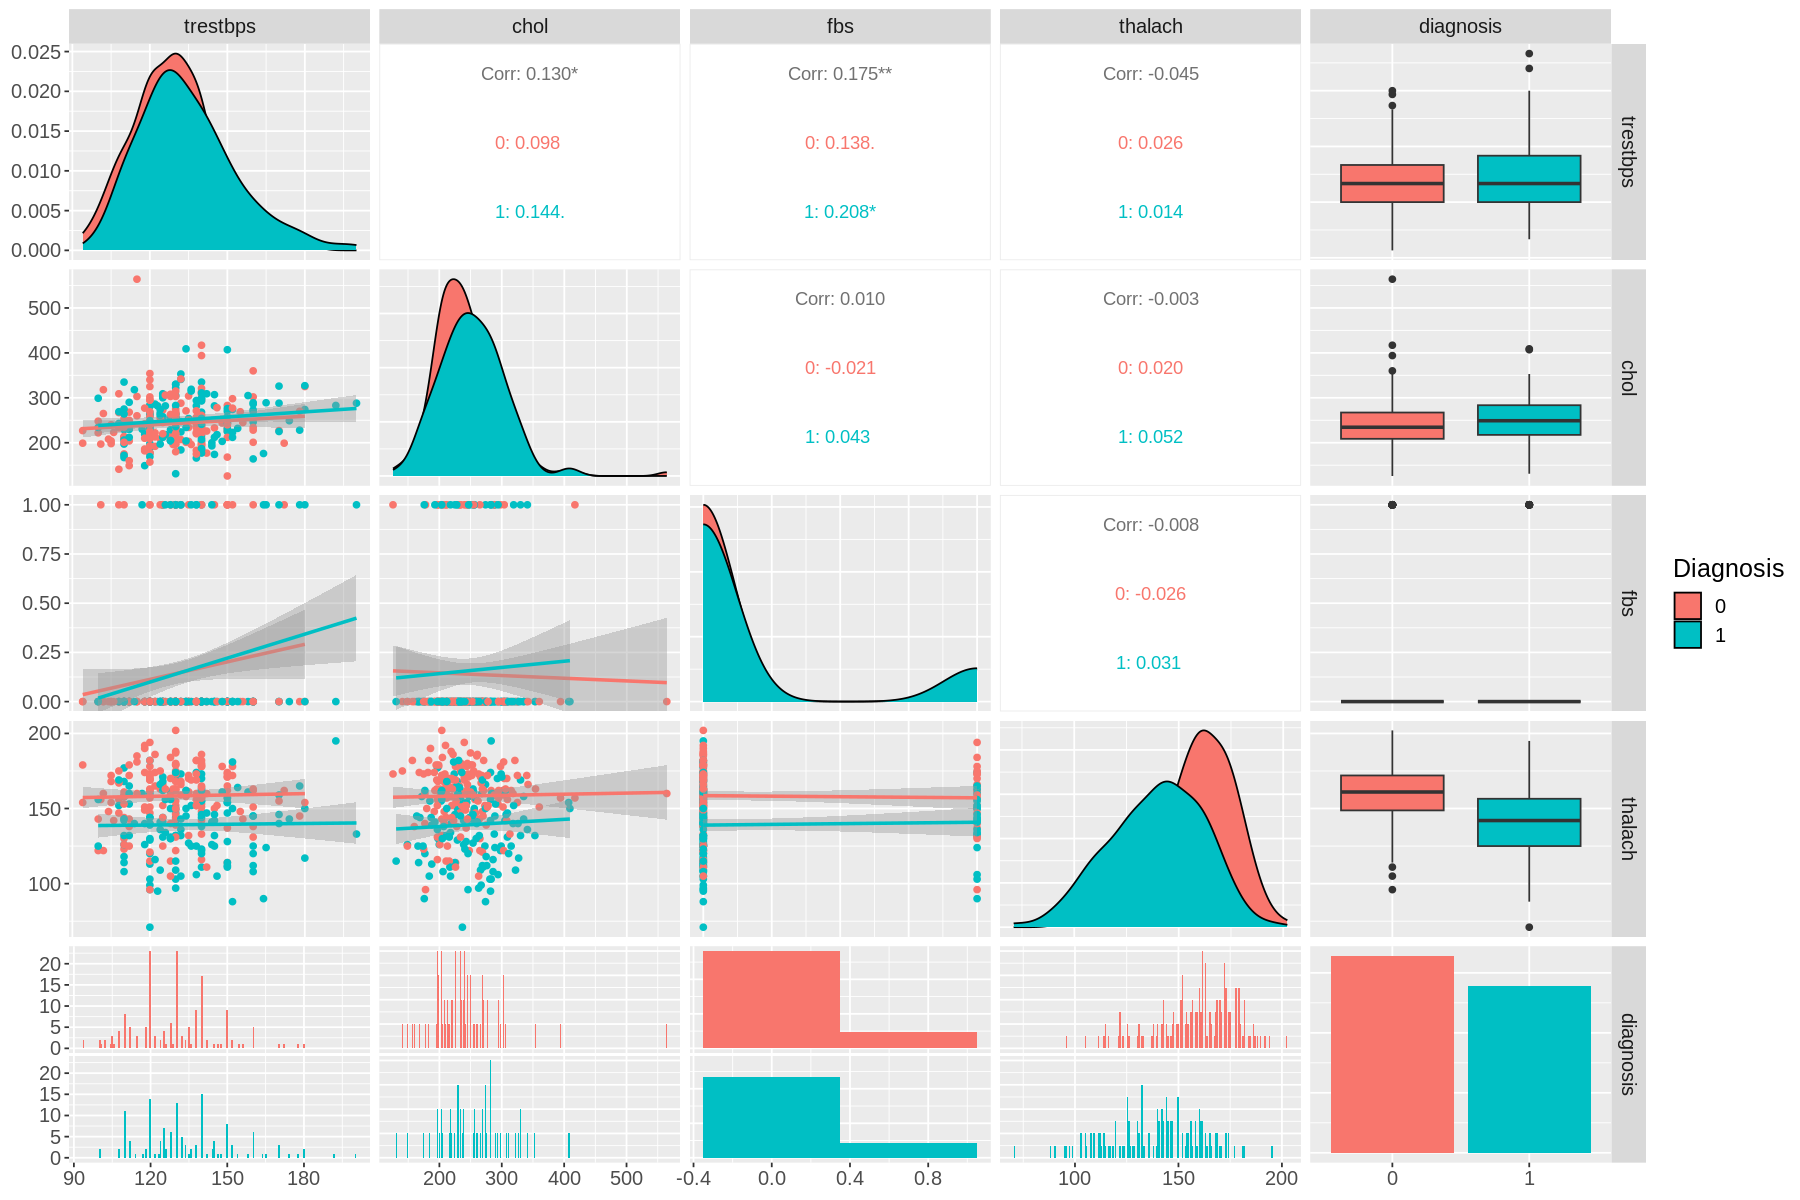

In [7]:
# using ggpairs for visualization of chosen predictors against one another
options(repr.plot.width=15, repr.plot.height=10)
wrangled_plots <- ggpairs(data_wrangled,
  columnLabels = c("trestbps", "chol", "fbs", "thalach", "diagnosis" ),
  mapping = aes(color = diagnosis),
  legend = 1,
  lower = list(combo=wrap("facethist",  binwidth=0.7), continuous = "smooth"),
  diag = list(continuous = "densityDiag")) +
  theme(text = element_text(size = 15)) +
  labs(fill = "Diagnosis")
wrangled_plots

*5 by 5 figure of graphs that display various plots of trestbps, chol, fbs, thalach, and diagnosis (in order). Trends and relations can be visualized amongst the four predictors, the last column shows the trends between a predictor and diagnoses in which x = predictor, y = diagnosis.*

## Data Analysis: Accuracy of Selected Predictors 
Our method included using K-nn classification to answer the primary question of this investigation. Classification is used as it is the overall aim to determine what predictor(s) most accurately classify diagnosis. To build our classification model, a 75/25 split is used with strata set to diagnosis, the dataset is separated into a training set and testing set. This is done so that the findings of our analysis can be tested for accuracy against a testing set representing 25% of the original data. 
The proceeding process includes scaling and centering each of the predictors selected, the neighbors are tuned so that 5-fold cross-validation is used to find the average accuracy of our predictors. It is placed into a workflow which finds the K-value with the highest accuracy for our classification.

For a clear breakdown of the accuracy for each individual predictor, tables 3.1.1 to 3.1.3 show the aforementioned process for finding the accuracy of the selected predictors used using one predictor at a time. For maximum heart rate (thalach), three values for K were found to produce the same accuracy, therefore only one out of the three values was chosen. This shows the process of how classification was used in the forward selection for each individual predictor.

Table 3.2.1 shows forward selection of the selected predictors, which repeats the same process to find the accuracy for the selected classifiers at once. Table 3.2.2 then shows all the accuracies found in the first step. From this, we can see how certain predictors provide more accuracy than others. This resulted in the same conclusion as the first process using a concise method. Figure 2.1 shows a bar graph of the predictors on the x-axis, and accuracy on the y-axis. 

In [8]:
# splitting data sets
data_split <- initial_split(data_wrangled, prop = 0.75, strata = diagnosis)
data_train <- training(data_split)
data_test <- testing(data_split)

## The FBS Problem
Table 3.1.0 shows the distribution of patients with fasting blood sugar less than 120mg/dl (0), and those that fall over 120mg/dl (1). The difference is 258 and 45 respectively. From figure 1.1, the fbs vs diagnosis graphs show similar distributions. The amount of patients with low fbs without a diagnosis appear to have a similar amount as those with a diagnosis, and the same is observed for high fbs. It is also noticed that Table 1.4 shows that the distribution of those with a heart disease diagnosis and those without is 139 and 164 respectively. Therefore despite fasting blood sugar being a controllable variable, the analysis is limited from this disparity which may be influenced by the choice of a binary measurement of fasting blood sugar rather than actual numbers for fbs levels. Proceeding we will focus on the three other variables that will answer the principle question.

**Table 3.1.0: Distribution of fasting blood sugar**

In [9]:
fbs_distribution <- data_new |>
select(fbs)|>
group_by(fbs)|>
summarise(count = n())
fbs_distribution

fbs,count
<dbl>,<int>
0,258
1,45


**Table 3.1.1: Accuracy of cholestoral (chol)**

In [10]:
#accuracy of cholesteral

recipe_chol <- recipe(diagnosis ~ chol, data = data_train) |>
step_scale(all_predictors()) |>
step_center(all_predictors())

model <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
set_engine("kknn") |>
set_mode("classification")

vfold <- vfold_cv(data_train, v = 5, strata = diagnosis)

fit_chol <- workflow() |>
add_recipe(recipe_chol) |>
add_model(model) |>
tune_grid(resamples = vfold, grid = tibble(neighbors = seq(from = 1, to = 100, by = 5)))

metrics_chol <- fit_chol |>
collect_metrics() |>
filter(.metric == 'accuracy')

tuned_K_chol <- metrics_chol |>
filter(mean == max(mean)) |>
select(neighbors) |>
pull()

metrics_chol
tuned_K_chol

tuned_model_chol <- nearest_neighbor(weight_func = "rectangular", neighbors = tuned_K_chol) |>
set_engine("kknn") |>
set_mode("classification")

fit_chol2 <- workflow() |>
add_recipe(recipe_chol) |>
add_model(tuned_model_chol) |>
fit_resamples(resamples = vfold)

metrics_chol2 <- fit_chol2 |>
collect_metrics() |>
filter(.metric == 'accuracy')

metrics_chol2

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5588362,5,0.024914179,Preprocessor1_Model01
6,accuracy,binary,0.5990514,5,0.004469375,Preprocessor1_Model02
11,accuracy,binary,0.5458015,5,0.027134637,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
86,accuracy,binary,0.5637769,5,0.02532320,Preprocessor1_Model18
91,accuracy,binary,0.5462890,5,0.02489739,Preprocessor1_Model19
96,accuracy,binary,0.5418401,5,0.02589246,Preprocessor1_Model20


[1] 6

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.5990514,5,0.004469375,Preprocessor1_Model1


**Table 3.1.2: Accuracy of resting blood sugar (trestbps)**

In [11]:
#accuracy of resting blood sugar

recipe_trestbps <- recipe(diagnosis ~ trestbps, data = data_train) |>
step_scale(all_predictors()) |>
step_center(all_predictors())

model <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
set_engine("kknn") |>
set_mode("classification")

vfold <- vfold_cv(data_train, v = 5, strata = diagnosis)

fit_trestbps <- workflow() |>
add_recipe(recipe_trestbps) |>
add_model(model) |>
tune_grid(resamples = vfold, grid = tibble(neighbors = seq(from = 1, to = 100, by = 5)))

metrics_trestbps <- fit_trestbps |>
collect_metrics() |>
filter(.metric == 'accuracy')

tuned_K_trestbps <- metrics_trestbps |>
filter(mean == max(mean)) |>
select(neighbors) |>
pull()

metrics_trestbps
tuned_K_trestbps

tuned_model_trestbps <- nearest_neighbor(weight_func = "rectangular", neighbors = tuned_K_trestbps) |>
set_engine("kknn") |>
set_mode("classification")

fit_trestbps2 <- workflow() |>
add_recipe(recipe_trestbps) |>
add_model(tuned_model_trestbps) |>
fit_resamples(resamples = vfold)

metrics_trestbps2 <- fit_trestbps2 |>
collect_metrics() |>
filter(.metric == 'accuracy')

metrics_trestbps2

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5503469,5,0.01670861,Preprocessor1_Model01
6,accuracy,binary,0.5771190,5,0.01825024,Preprocessor1_Model02
11,accuracy,binary,0.5724726,5,0.01857606,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
86,accuracy,binary,0.5550856,5,0.009823157,Preprocessor1_Model18
91,accuracy,binary,0.5418445,5,0.002161943,Preprocessor1_Model19
96,accuracy,binary,0.5462934,5,0.010224636,Preprocessor1_Model20


[1] 21

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.5857137,5,0.01530086,Preprocessor1_Model1


**Table 3.1.3: Accuracy of maximum heart rate (thalach)**

In [12]:
#accuracy of maximum heart rate

recipe_thalach <- recipe(diagnosis ~ thalach, data = data_train) |>
step_scale(all_predictors()) |>
step_center(all_predictors())

model <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
set_engine("kknn") |>
set_mode("classification")

vfold <- vfold_cv(data_train, v = 5, strata = diagnosis)

fit_thalach <- workflow() |>
add_recipe(recipe_thalach) |>
add_model(model) |>
tune_grid(resamples = vfold, grid = tibble(neighbors = seq(from = 1, to = 100, by = 5)))

metrics_thalach <- fit_thalach |>
collect_metrics() |>
filter(.metric == 'accuracy')

tuned_K_thalach <- metrics_thalach |>
filter(mean == max(mean)) |>
select(neighbors) |>
pull()

metrics_thalach
tuned_K_thalach

tuned_model_thalach <- nearest_neighbor(weight_func = "rectangular", neighbors = 86) |>
set_engine("kknn") |>
set_mode("classification")

fit_thalach2 <- workflow() |>
add_recipe(recipe_thalach) |>
add_model(tuned_model_thalach) |>
fit_resamples(resamples = vfold)

metrics_thalach2 <- fit_thalach2 |>
collect_metrics() |>
filter(.metric == 'accuracy')

metrics_thalach2

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5641722,5,0.02265409,Preprocessor1_Model01
6,accuracy,binary,0.6303777,5,0.03314381,Preprocessor1_Model02
11,accuracy,binary,0.6784058,5,0.04857473,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
86,accuracy,binary,0.7137769,5,0.05051749,Preprocessor1_Model18
91,accuracy,binary,0.6959903,5,0.04876773,Preprocessor1_Model19
96,accuracy,binary,0.7094291,5,0.04724669,Preprocessor1_Model20


[1] 76 81 86

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.7137769,5,0.05051749,Preprocessor1_Model1


**Table 3.2.1: Forward selection of predictors**

In [13]:
names <- colnames(data_train |> select(-diagnosis))

# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")

# create a 5-fold cross-validation object
heart_vfold <- vfold_cv(data_train, v = 5, strata = diagnosis)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("diagnosis", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        heart_recipe <- recipe(as.formula(model_string), 
                                data = data_test) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(heart_recipe) |>
          add_model(knn_spec) |>
          tune_grid(resamples = heart_vfold, grid = 10) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |> 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies

size,model_string,accuracy
<int>,<chr>,<dbl>
1,diagnosis ~ thalach,0.7043786
2,diagnosis ~ thalach+trestbps,0.6695960
3,diagnosis ~ thalach+trestbps+chol,0.6868863
4,diagnosis ~ thalach+trestbps+chol+fbs,0.6471585


**Table 3.2.2: Table of all accuracies**

In [14]:
#table of all accuracies
chol <- mutate(metrics_chol2, variable = "Cholesterol") |>
    rename(accuracy = mean) |>
    select(variable, accuracy)
trest <- mutate(metrics_trestbps2, variable = "Resting blood sugar") |>
    rename(accuracy = mean) |>
    select(variable, accuracy)
thal <- mutate(metrics_thalach2, variable = "Maximum heart rate") |>
    rename(accuracy = mean) |>
    select(variable, accuracy)
acc <- mutate(accuracies, variable = model_string) |>
    select(variable, accuracy)

all_accuracies <- rbind(chol, trest, thal, acc)

all_accuracies

variable,accuracy
<chr>,<dbl>
Cholesterol,0.5990514
Resting blood sugar,0.5857137
Maximum heart rate,0.7137769
⋮,⋮
diagnosis ~ thalach+trestbps,0.6695960
diagnosis ~ thalach+trestbps+chol,0.6868863
diagnosis ~ thalach+trestbps+chol+fbs,0.6471585


*Table with variable = predictor, accuracy*

**Figure 2.1: Accuracy for different variables and combinations**

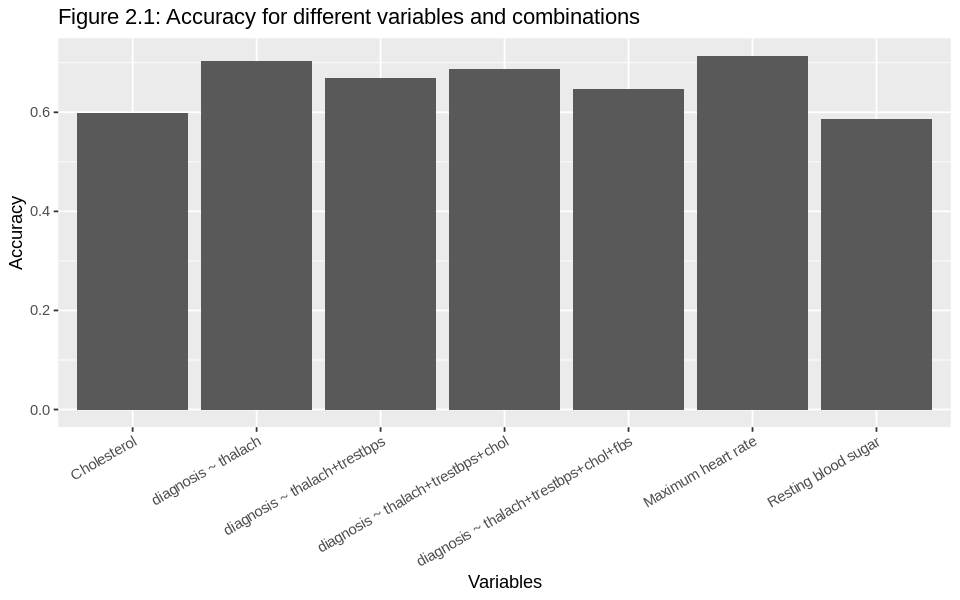

In [15]:
options(repr.plot.width = 8, repr.plot.height = 5)
graph <- all_accuracies |>
    ggplot(aes(x = variable, y = accuracy)) +
    geom_bar(stat="identity") +
    labs(title = "Figure 2.1: Accuracy for different variables and combinations", x = "Variables", y = "Accuracy") +
    theme(axis.text.x = element_text(angle = 30, hjust = 1))
graph

*Table with variables (predictors) on x-axis, accuracy on y-axis*

## Results and Discussion

To solve for the most accurate variable in predicting CVD, the KNN results of each variable, as well as the forward selections, are visualized in a bar graph. Altogether, the analysis conducted on the Cleveland database dictates that maximum heart rate, or thalach, is the most accurate variable when predicting the likelihood of developing CVD, with an accuracy of approximately 71%. Compared to resting blood sugar and cholestoral, who have ~56% and ~60% accuracy respectively. This analysis was limited by the fact that fbs (fasting blood sugar) was not used to find its individual accuracy. Though an observation in table 3.2.2 displays fbs and thalach used as predictors, and accuracy decreased to ~68%. This could indicate that fbs is limited in heart disease diagnosis compared to thalach, however fbs accuracy still remains unknown.

It is not an unsurprising result that the findings support the fact that maximum heart rate was the more accurate predictor. While both cholestoral and resting blood sugar are important bodily statistics, cardiovascular system is one of the most important. As well, maximum heart rate pertains directly to the condition of the heart, identical to CVD. These findings bring tangible advice to the residents of Cleveland; lowering maximum heart rate is the most effective way to reduce risks of CVD. With future studies conducted on larger, less specified populations, the findings could impact the perception of CVD on a global scale. 


## References

Centers for Disease Control and Prevention. (2022, September 30). Manage Blood Sugar. Centers for        Disease Control and Prevention. https://www.cdc.gov/diabetes/managing/manage-blood-sugar.html

Centers for Disease Control and Prevention. (2023, October 19). What is Thalassemia?. Centers for Disease Control and Prevention.        https://www.cdc.gov/ncbddd/thalassemia/index.html#:~:text=Thalassemia%20is%20an%20inherited%20(i.e.,blood%20transfusions%20and%20chelation%20therapy.

Chen, A. H., Huang, S. Y., Hong, P. S., Cheng, C. H., & Lin, E. J. (2011, September). HDPS: Heart        disease prediction system. In 2011 computing in Cardiology (pp. 557-560). IEEE.

Getting active to control high blood pressure. www.heart.org. (2023, October 17).           https://www.heart.org/en/health-topics/high-blood-pressure/changes-you-can-make-to-manage-high-blood-pressure/getting-active-to-control-high-blood-pressure 

Janosi, Andras, Steinbrunn, William, Pfisterer, Matthias, and Detrano, Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.

Pyörälä, K., Savolainen, E., Lehtovirta, E., Punsar, S., & Siltanen, P. (1979). Glucose tolerance   and coronary heart disease: Helsinki Policemen Study. Journal of chronic diseases, 32(11-12), 729-745.

World Health Organization. (11 June 2021). Cardiovascular diseases (CVDs). WHO. https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)

